<a href="https://colab.research.google.com/github/Umaporn19/Project/blob/main/predictcarthree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np

In [3]:
import os
%cd /content
if not os.path.isdir("efficientnet_keras_transfer_learning"):
 !git clone https://github.com/Wanita-8943/efficientnet_keras_transfer_learning
%cd efficientnet_keras_transfer_learning/

/content
Cloning into 'efficientnet_keras_transfer_learning'...
remote: Enumerating objects: 653, done.
remote: Counting objects: 100% (175/175), done.
remote: Compressing objects: 100% (72/72), done.
remote: Total 653 (delta 143), reused 103 (delta 103), pack-reused 478
Receiving objects: 100% (653/653), 12.00 MiB | 26.42 MiB/s, done.
Resolving deltas: 100% (383/383), done.
/content/efficientnet_keras_transfer_learning


In [4]:
df = pd.read_csv (r'/content/drive/My Drive/model/pathname.csv')
df

,Unnamed: 0,Path_Name,Part,Angle,Distance
0,0,/content/drive/My Drive/id8/Base/p13/dis1.85I3...,p13,Angle180L2,dis1.85I3
1,1,/content/drive/My Drive/id8/Base/p13/dis1.85I3...,p13,Angle180L2,dis1.85I3
2,2,/content/drive/My Drive/id8/Base/p13/dis1.85I3...,p13,Angle180L2,dis1.85I3
3,3,/content/drive/My Drive/id8/Base/p13/dis1.85I3...,p13,Angle180L2,dis1.85I3
4,4,/content/drive/My Drive/id8/Base/p13/dis1.85I3...,p13,Angle180L2,dis1.85I3
...,...,...,...,...,...
13360,13360,/content/drive/My Drive/id8/Base/p09/dis1.65O3...,p09,Angle107L3,dis1.65O3
13361,13361,/content/drive/My Drive/id8/Base/p09/dis1.65O3...,p09,Angle107L3,dis1.65O3
13362,13362,/content/drive/My Drive/id8/Base/p09/dis1.65O3...,p09,Angle107L3,dis1.65O3
13363,13363,/content/drive/My Drive/id8/Base/p09/dis1.65O3...,p09,Angle107L3,dis1.65O3


In [5]:
import sys
sys.path.append('/content/drive/MyDrive/model/modelcarten.h5')

from efficientnet.layers import Swish, DropConnect
from efficientnet.model import ConvKernalInitializer
from tensorflow.keras.utils import get_custom_objects

get_custom_objects().update({
    'ConvKernalInitializer': ConvKernalInitializer,
    'Swish': Swish,
    'DropConnect':DropConnect
})

In [6]:
from tensorflow.keras.models import load_model
model = load_model('/content/drive/MyDrive/model/modelcarten.h5')
height = width = model.input_shape[1]

In [7]:
base_dir = '/content/drive/My Drive/id8'
os.makedirs(base_dir, exist_ok=True)

# Directories for our training,
# validation and test splits
train_dir = os.path.join(base_dir, 'Base')
os.makedirs(train_dir, exist_ok=True)
test_dir = os.path.join(base_dir, 'Minor')
#os.makedirs(test_dir, exist_ok=True)

In [8]:
batch_size = 16

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
      rescale=1./255, #โมเดลส่วนใหญ่ต้องใช้ RGB ในช่วง 0–1
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory #ไดเรกเป้าหมาย
        train_dir,
        # รูปภาพทั้งหมดจะถูกปรับขนาดตามความสูงและความกว้างของเป้าหมาย
        target_size=(height, width),
        batch_size=batch_size,
        # Since we use categorical_crossentropy loss, we need categorical labels
        #เนื่องจากเราใช้ categorical_crossentropy loss เราจึงต้องมีป้ายกำกับตามหมวดหมู่
        class_mode='categorical')

#label
labels = (train_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())
print(labels)

Found 13365 images belonging to 15 classes.
{0: 'p01', 1: 'p02', 2: 'p03', 3: 'p04', 4: 'p05', 5: 'p06', 6: 'p07', 7: 'p08', 8: 'p09', 9: 'p10', 10: 'p11', 11: 'p12', 12: 'p13', 13: 'p14', 14: 'p15'}


In [9]:
df2 = pd.read_csv (r'/content/drive/My Drive/model/pathnametwo.csv')
df2

,Unnamed: 0,Path_Name,Part,Angle,Distance
0,0,/content/drive/My Drive/id8/Minor/p10/dis1.65I...,p10,Angle253R1,dis1.65I3
1,1,/content/drive/My Drive/id8/Minor/p10/dis1.65I...,p10,Angle253R1,dis1.65I3
2,2,/content/drive/My Drive/id8/Minor/p10/dis1.65I...,p10,Angle253R1,dis1.65I3
3,3,/content/drive/My Drive/id8/Minor/p10/dis1.65I...,p10,Angle253R1,dis1.65I3
4,4,/content/drive/My Drive/id8/Minor/p10/dis1.65I...,p10,Angle253R1,dis1.65I3
...,...,...,...,...,...
13360,13360,/content/drive/My Drive/id8/Minor/p09/dis1.65O...,p09,Angle107L2,dis1.65O5
13361,13361,/content/drive/My Drive/id8/Minor/p09/dis1.65O...,p09,Angle107L2,dis1.65O5
13362,13362,/content/drive/My Drive/id8/Minor/p09/dis1.65O...,p09,Angle107L2,dis1.65O5
13363,13363,/content/drive/My Drive/id8/Minor/p09/dis1.65O...,p09,Angle107L2,dis1.65O5


In [10]:
test = df2[df2['Unnamed: 0'].between(0,13364)]
test

,Unnamed: 0,Path_Name,Part,Angle,Distance
0,0,/content/drive/My Drive/id8/Minor/p10/dis1.65I...,p10,Angle253R1,dis1.65I3
1,1,/content/drive/My Drive/id8/Minor/p10/dis1.65I...,p10,Angle253R1,dis1.65I3
2,2,/content/drive/My Drive/id8/Minor/p10/dis1.65I...,p10,Angle253R1,dis1.65I3
3,3,/content/drive/My Drive/id8/Minor/p10/dis1.65I...,p10,Angle253R1,dis1.65I3
4,4,/content/drive/My Drive/id8/Minor/p10/dis1.65I...,p10,Angle253R1,dis1.65I3
...,...,...,...,...,...
13360,13360,/content/drive/My Drive/id8/Minor/p09/dis1.65O...,p09,Angle107L2,dis1.65O5
13361,13361,/content/drive/My Drive/id8/Minor/p09/dis1.65O...,p09,Angle107L2,dis1.65O5
13362,13362,/content/drive/My Drive/id8/Minor/p09/dis1.65O...,p09,Angle107L2,dis1.65O5
13363,13363,/content/drive/My Drive/id8/Minor/p09/dis1.65O...,p09,Angle107L2,dis1.65O5


In [11]:
act = test['Part'].tolist() 
path = test['Path_Name'].tolist() 

In [12]:
# act

In [13]:
from tensorflow.keras.preprocessing import image

def predict_image(img_path):
    # Read the image and resize it
    img = image.load_img(img_path, target_size=(height, width))
    # Convert it to a Numpy array with target shape.
    x = image.img_to_array(img)
    # Reshape
    x = x.reshape((1,) + x.shape) 
    x /= 255.
    result = model.predict([x])
    return result[0]

In [14]:
predict_image(path[0])

1/1 [==============================] - 2s 2s/step


array([1.27013873e-05, 7.91875266e-07, 2.49148870e-04, 5.73359976e-05,
       2.83692122e-01, 3.77660334e-01, 1.18462965e-04, 8.06499389e-04,
       1.92509934e-01, 1.39310107e-01, 2.58083950e-04, 4.78722481e-03,
       4.49357583e-04, 1.82795338e-05, 6.96235875e-05], dtype=float32)

In [15]:
#no = np.argmax(predict_image(path[0]))
#labels[no]

In [16]:
#Predict
pred_list = list()
prob_list = list()
img_path= path
for i in range(0,len(img_path)):
    predict = predict_image(img_path[i])
    result = np.argmax(predict)
    pred_list.append(labels[result])
    prob_list.append(predict[result])

เอาต์พุตของการสตรีมมีการตัดเหลือเพียง 5000 บรรทัดสุดท้าย
1/1 [==============================] - 0s 57ms/step


In [17]:
pred_list

['p06',
 'p05',
 'p09',
 'p09',
 'p09',
 'p05',
 'p09',
 'p09',
 'p05',
 'p05',
 'p10',
 'p09',
 'p05',
 'p05',
 'p09',
 'p05',
 'p09',
 'p09',
 'p10',
 'p06',
 'p09',
 'p10',
 'p05',
 'p09',
 'p05',
 'p09',
 'p05',
 'p05',
 'p05',
 'p06',
 'p05',
 'p05',
 'p05',
 'p10',
 'p05',
 'p05',
 'p09',
 'p05',
 'p09',
 'p09',
 'p10',
 'p05',
 'p09',
 'p09',
 'p10',
 'p10',
 'p09',
 'p05',
 'p05',
 'p05',
 'p05',
 'p05',
 'p06',
 'p09',
 'p09',
 'p09',
 'p09',
 'p09',
 'p09',
 'p09',
 'p09',
 'p09',
 'p10',
 'p09',
 'p09',
 'p09',
 'p09',
 'p09',
 'p10',
 'p10',
 'p09',
 'p09',
 'p09',
 'p09',
 'p10',
 'p09',
 'p10',
 'p09',
 'p09',
 'p09',
 'p09',
 'p09',
 'p10',
 'p05',
 'p05',
 'p05',
 'p05',
 'p09',
 'p05',
 'p05',
 'p09',
 'p09',
 'p05',
 'p05',
 'p09',
 'p05',
 'p09',
 'p10',
 'p09',
 'p10',
 'p09',
 'p10',
 'p09',
 'p09',
 'p09',
 'p09',
 'p09',
 'p09',
 'p05',
 'p09',
 'p10',
 'p09',
 'p05',
 'p09',
 'p09',
 'p09',
 'p05',
 'p10',
 'p09',
 'p09',
 'p05',
 'p09',
 'p09',
 'p09',
 'p10',


In [18]:
prob_list[0]

0.37766033

In [19]:
pred = np.array(pred_list)
act = np.array(act)

In [20]:
import numpy as np
from sklearn.metrics import confusion_matrix

# act = data_train['class'].array
# pred = data_train['category_ov'].array

cmat = confusion_matrix(act, pred)
print('classifier accuracy = {}%'.format((100.*np.trace(cmat))/(np.sum(cmat))))

#Marking the Confusion Matrix
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(act, pred))#performance

classifier accuracy = 59.61840628507295%
              precision    recall  f1-score   support

         p01       1.00      1.00      1.00       891
         p02       1.00      1.00      1.00       891
         p03       0.52      0.70      0.59       891
         p04       0.67      0.20      0.31       891
         p05       0.46      0.68      0.55       891
         p06       0.24      0.06      0.09       891
         p07       0.48      0.33      0.39       891
         p08       0.47      0.67      0.55       891
         p09       0.04      0.02      0.03       891
         p10       0.19      0.34      0.25       891
         p11       0.64      0.82      0.72       891
         p12       0.60      0.57      0.59       891
         p13       0.89      0.63      0.74       891
         p14       0.71      0.92      0.81       891
         p15       1.00      1.00      1.00       891

    accuracy                           0.60     13365
   macro avg       0.59      0.60      

Text(0.5, 21.5, 'Predicted label')

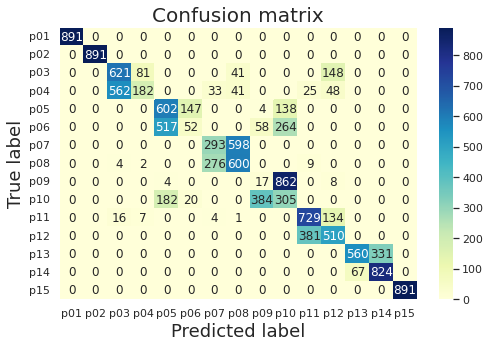

In [21]:
#create CF 
data = {'Actual': act,'Predicted' : pred,}
df = pd.DataFrame(data, columns=['Actual','Predicted'])
conf_mat = pd.crosstab(df['Actual'],df['Predicted'],rownames=['Actual'],colnames=['Predicted'])

#Confusion matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
cm = confusion_matrix(act, pred)

#plot Confusion matrix
import seaborn as sns
sns.set()
fig, ax = plt.subplots(figsize=(8, 5))

ax = sns.heatmap(conf_mat, annot=True, fmt="d", cmap="YlGnBu") #Blues,Oranges,Reds
ax.set_title('Confusion matrix',fontsize=20)
ax.set_ylabel('True label',fontsize=18)
ax.set_xlabel('Predicted label',fontsize=18)